In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
from scipy.integrate import ode
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize

# 1

In [2]:
def brent_min(f=None, a=None, c=None,tol=None):
    gratio=(3.-np.sqrt(5))/2
    b=a+gratio*(c-a) #assuming b isn't min
    step=[]
    point_ma=np.array([[a,b,c],[f(a),f(b),f(c)]],dtype=np.float64)
    for i in np.arange(2):
        x=point_ma[0,1]-0.5*(((point_ma[1,1]-point_ma[1,2])*(point_ma[0,1]-point_ma[0,0])**2)-(point_ma[1,1]-point_ma[1,0])*(point_ma[0,1]-point_ma[0,2])**2)/(((point_ma[1,1]-point_ma[1,2])*(point_ma[0,1]-point_ma[0,0]))-(point_ma[1,1]-point_ma[1,0])*(point_ma[0,1]-point_ma[0,2]))
        if x<point_ma[0,0] or x>point_ma[0,2]:
            if point_ma[0,1]-point_ma[0,0] < point_ma[0,2]-point_ma[0,1]:
                x=point_ma[0,1]+gratio*(point_ma[0,2]-point_ma[0,1]) #golden section search
                if f(x)>point_ma[1,1]:
                    point_ma[:,2]=[x,f(x)]
                else:
                    point_ma[:,0]=point_ma[:,1]
                    point_ma[:,1]=[x,f(x)]
            else:
                x=point_ma[0,1]-gratio*(point_ma[0,1]-point_ma[0,0])
                if f(x)>point_ma[1,1]:
                    point_ma[:,0]=[x,f(x)]
                else:
                    point_ma[:,2]=point_ma[:,1]
                    point_ma[:,1]=[x,f(x)]
        elif x>point_ma[0,1]:
            if f(x)>point_ma[1,1]:
                point_ma[:,2]=[x,f(x)]
            else:
                point_ma[:,0]=point_ma[:,1]
                point_ma[:,1]=[x,f(x)]
        else:
            if f(x)>point_ma[1,1]:
                point_ma[:,0]=[x,f(x)]
            else:
                point_ma[:,2]=point_ma[:,1]
                point_ma[:,1]=[x,f(x)]
        step=np.append(step,x)
    while point_ma[0,2]-point_ma[0,0]> tol:
        x=point_ma[0,1]-0.5*(((point_ma[1,1]-point_ma[1,2])*(point_ma[0,1]-point_ma[0,0])**2)-(point_ma[1,1]-point_ma[1,0])*(point_ma[0,1]-point_ma[0,2])**2)/(((point_ma[1,1]-point_ma[1,2])*(point_ma[0,1]-point_ma[0,0]))-(point_ma[1,1]-point_ma[1,0])*(point_ma[0,1]-point_ma[0,2]))
        if x<point_ma[0,0] or x>point_ma[0,2] or f(x)>f(step[-2]):
            if point_ma[0,1]-point_ma[0,0] < point_ma[0,2]-point_ma[0,1]:
                x=point_ma[0,1]+gratio*(point_ma[0,2]-point_ma[0,1]) #golden section search
                if f(x)>point_ma[1,1]:
                    point_ma[:,2]=[x,f(x)]
                else:
                    point_ma[:,0]=point_ma[:,1]
                    point_ma[:,1]=[x,f(x)]
            else:
                x=point_ma[0,1]-gratio*(point_ma[0,1]-point_ma[0,0])
                if f(x)>point_ma[1,1]:
                    point_ma[:,0]=[x,f(x)]
                else:
                    point_ma[:,2]=point_ma[:,1]
                    point_ma[:,1]=[x,f(x)]
        elif x>point_ma[0,1]:
            if f(x)>point_ma[1,1]:
                point_ma[:,2]=[x,f(x)]
            else:
                point_ma[:,0]=point_ma[:,1]
                point_ma[:,1]=[x,f(x)]
        else:
            if f(x)>point_ma[1,1]:
                point_ma[:,0]=[x,f(x)]
            else:
                point_ma[:,2]=point_ma[:,1]
                point_ma[:,1]=[x,f(x)]
        step=np.append(step,x)
    plt.plot(np.linspace(a,c,1000),f(np.linspace(a,c,1000)))
    plt.plot(step,f(step),color='black')
    plt.plot(step,f(step),'.',color='black')
    print(point_ma[:,1],np.size(step))
        

<IPython.core.display.Javascript object>


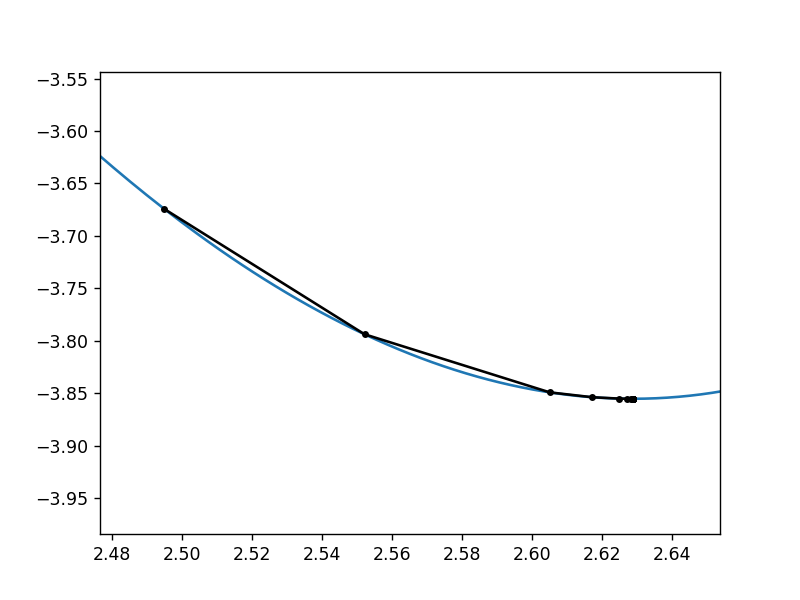

[ 2.62894851 -3.85539447] 32


In [4]:
quart=lambda x: x**4-4*x**3+x**2+5*x+1
brent_min(f=quart, a=1.5, c=3.1,tol=10**(-10))

In [6]:
optimize.brent(quart,brack=(1.5,1.5+(1.6)*(3.-np.sqrt(5))/2,3.1),tol=10**(-10),full_output=1)

(2.6289485064913736, -3.8553944720773643, 14, 15)

Given the same tolerance of $10^{-10}$ and starting points, the scipy implementation only took **14** steps while my implementaion took **32** steps

## 2

## Euler's Method

In [4]:
def Euler_Method(xi=None, vi=None, theta=None, tstep=None):
    pos=np.array([0,0])
    alpha=0.3
    vi=np.array([vi*np.cos(theta), vi*np.sin(theta)])
    i=0
    pos=np.vstack([pos,[pos[0]+vi[0]*tstep, pos[1]+vi[1]*tstep]])
    vi=np.vstack([vi,[vi[0]-tstep*alpha*vi[0]**2,vi[1]-(9.8+(alpha*vi[1]**2))*tstep]])
    i=i+1
    while pos[i,1]>0:
        vi=np.vstack([vi,[vi[i,0]-tstep*alpha*vi[i,0]**2,vi[i,1]-(9.8+(alpha*vi[i,1]**2))*tstep]])
        pos=np.vstack([pos,[pos[i,0]+vi[i,0]*tstep,pos[i,1]+vi[i,1]*tstep]])
        i=i+1
    return(pos, vi, i)

<IPython.core.display.Javascript object>


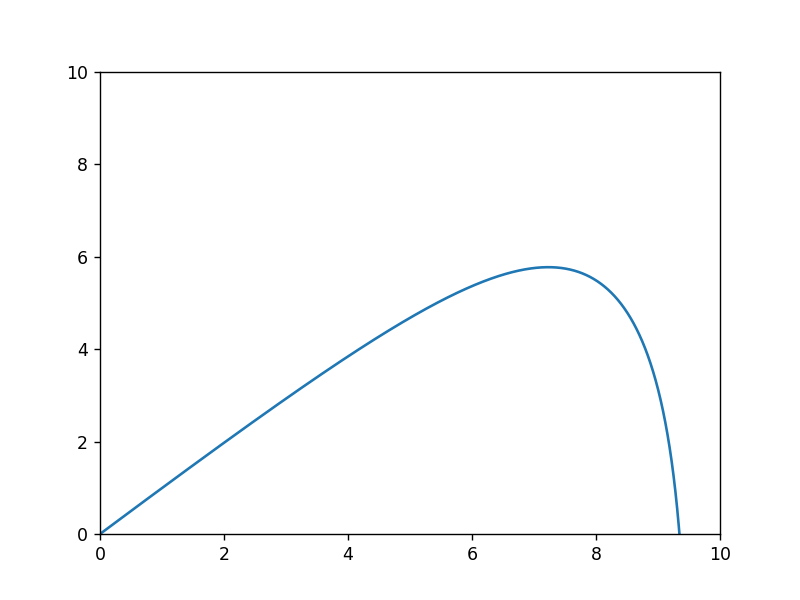

In [5]:
x_=Euler_Method(np.array([0,0]), vi=45, theta=np.pi/4, tstep=0.0001)[0][:,0]
y_=Euler_Method(np.array([0,0]), vi=45, theta=np.pi/4, tstep=0.0001)[0][:,1]

plt.plot(x_,y_)
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

In [6]:
Euler_Method(np.array([0,0]), vi=45, theta=np.pi/4, tstep=0.0001)

(array([[  0.00000000e+00,   0.00000000e+00],
        [  3.18198052e-03,   3.18198052e-03],
        [  6.36092353e-03,   6.36082553e-03],
        ..., 
        [  9.34545645e+00,   5.12704797e-03],
        [  9.34564916e+00,   1.95167646e-03],
        [  9.34584185e+00,  -1.22681794e-03]]),
 array([[ 31.81980515,  31.81980515],
        [ 31.78943015,  31.78845015],
        [ 31.75911312,  31.75715499],
        ..., 
        [  1.92707522, -31.75371505],
        [  1.92696381, -31.784944  ],
        [  1.92685241, -31.81623248]]),
 16249)

With 16249 iterations at 0.0001 second per step, the flight time is about **1.6249** sec.

## Scipy's Runge-Kutta

In [8]:
def f(t=None, y=None):
    return(np.array([y[1],-0.3*(y[1]**2),y[3],-9.8-0.3*(y[3]**2)]))
y0=np.array([0,45*np.cos(np.pi/4),0,45*np.sin(np.pi/4)])

In [9]:
RKMethod = ode(f).set_integrator("dopri5")
RKMethod.set_initial_value(y0,0)
t=0.0001
i=1
position=np.vstack([y0[0:3:2],RKMethod.integrate(t)[0:3:2]])
while position[i,1] > 0:
    i += 1
    t += 0.0001
    position=np.vstack([position,RKMethod.integrate(t)[0:3:2]])

<IPython.core.display.Javascript object>


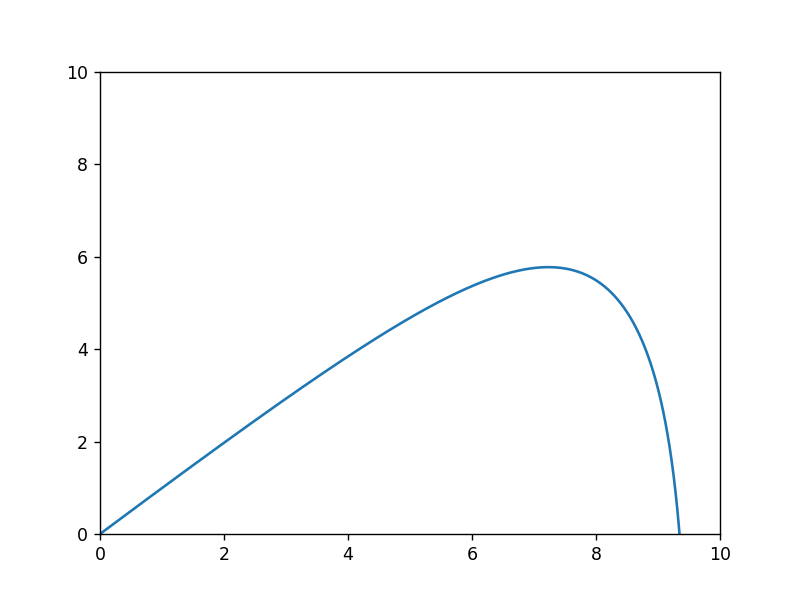

In [111]:
plt.plot(position[:,0],position[:,1])
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

In [113]:
print(position,t)

[[  0.00000000e+00   0.00000000e+00]
 [  3.18046273e-03   3.18041376e-03]
 [  6.35789375e-03   6.35769800e-03]
 ..., 
 [  9.34660382e+00   3.54551315e-03]
 [  9.34679655e+00   3.65459143e-04]
 [  9.34698926e+00  -2.81772968e-03]] 1.6249999999998375


Runge-Kutta's method show flight time of **1.6250** which matches the result from Euler's Method almost exactly. 

# 3.

In [123]:
dis=lambda y: -Euler_Method(np.array([0,0]), vi=45, theta=y, tstep=0.0001)[0][-2][0]
optimize.brent(dis,brack=(0,np.pi/2),tol=10**(-10),full_output=1)

C:\Users\Zhonghan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Zhonghan\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1850: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


(0.43610198764444347, -9.8571826845098247, 44, 45)

In [125]:
dis=lambda y: -Euler_Method(np.array([0,0]), vi=100, theta=y, tstep=0.0001)[0][-2][0]
optimize.brent(dis,brack=(0,np.pi/2),tol=10**(-10),full_output=1)

C:\Users\Zhonghan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Zhonghan\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1850: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


(0.33519020276730144, -12.845614404806286, 46, 47)

With air drag, the "maximum-range" angle depends on the initial velocity. For **45** m/s the angle would be **0.436** rad, and **100** m/s the angle would be **0.335** rad.

# 4.

In [3]:
def f2d(t=None, y=None): #assuming wind in the direction of positive x2
    w=10
    if y[1] < 0 and y[5]-w < 0:
        return(np.array([y[1],0.3*(y[1]**2),y[3],-9.8-0.3*(y[3]**2),y[5],0.3*(y[5]-w)**2]))
    elif y[1]> 0 and y[5]-w < 0:
        return(np.array([y[1],-0.3*(y[1]**2),y[3],-9.8-0.3*(y[3]**2),y[5],0.3*(y[5]-w)**2]))
    elif y[1]<0 and y[5]-w > 0:
        return(np.array([y[1],0.3*(y[1]**2),y[3],-9.8-0.3*(y[3]**2),y[5],-0.3*(y[5]-w)**2]))
    else:
        return(np.array([y[1],-0.3*(y[1]**2),y[3],-9.8-0.3*(y[3]**2),y[5],-0.3*(y[5]-w)**2]))
def postrack(vi=None, phi=None, theta=None):
    ini_y=np.array([0,vi*np.cos(phi)*np.cos(theta),0,vi*np.sin(theta),0,vi*np.sin(phi)*np.cos(theta)])
    ivp = ode(f2d).set_integrator("dopri5")
    ivp.set_initial_value(ini_y,0)
    t=0.0001
    i=1
    A=np.vstack([ini_y[0:5:2],ivp.integrate(t)[0:5:2]])
    while A[i,1] > 0:
        i += 1
        t += 0.0001
        A=np.vstack([A,ivp.integrate(t)[0:5:2]])
    return(A)

<IPython.core.display.Javascript object>


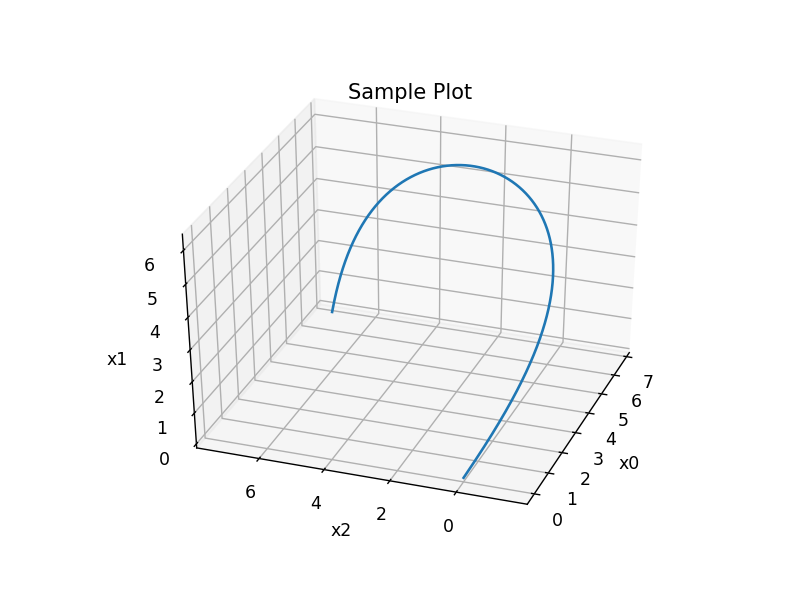

In [8]:
b=np.array([45,-1,1])
z=postrack(*b)

fig = plt.figure()
ax=fig.gca(projection = "3d")

ax.plot(z[:,0],z[:,2],z[:,1])
ax.set_xlabel('x0')
ax.set_ylabel('x2')
ax.set_zlabel('x1')
plt.title("Sample Plot")
plt.show()

In [4]:
d=10
D=np.array([d,0,0])
Landing=lambda v: np.linalg.norm(postrack(v[0],v[1],v[2])[-2]-D)
cons=({'type': 'ineq',
       'fun': lambda x1: x1[0]},
      {'type': 'ineq',
       'fun': lambda x2: x2[1]+np.pi},
      {'type': 'ineq',
       'fun': lambda x3: np.pi-x3[1]},
      {'type': 'ineq',
       'fun': lambda x4: x4[2]},
      {'type': 'ineq',
       'fun': lambda x5: np.pi/2-x5[2]})

In [6]:
b=np.array([45,-1,1])
bnds=((10, 200), (-np.pi, np.pi), (0, np.pi/2))
optimize.minimize(Landing,b,method="L-BFGS-B",bounds=bnds,options={'disp': True,"eps": 1e-08})

      fun: 4.9064174823114247e-05
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.04798387,  0.00499417, -0.01443658])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 772
      nit: 35
   status: 0
  success: True
        x: array([  8.20151333e+01,  -5.45577826e-01,   6.89695135e-02])

<IPython.core.display.Javascript object>


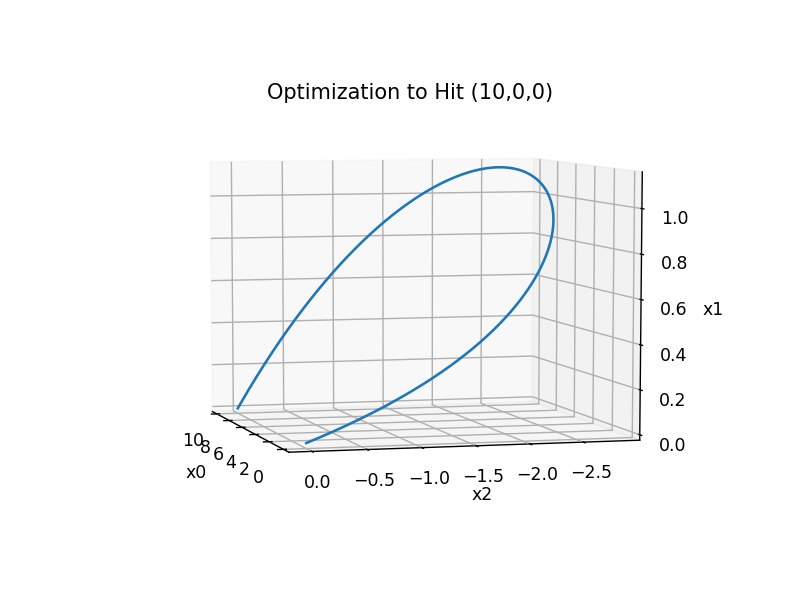

In [7]:
b=np.array([  8.20151333e+01,  -5.45577826e-01,   6.89695135e-02])
z=postrack(*b)

fig = plt.figure()
ax=fig.gca(projection = "3d")

ax.plot(z[:,0],z[:,2],z[:,1])
ax.set_xlabel('x0')
ax.set_ylabel('x2')
ax.set_zlabel('x1')
plt.title("Optimization to Hit (10,0,0)")
plt.show()

I used the BFGS method from scipy and got the result with precision **4.90e-05**. Since the function is non convex different initial guess with greatly change the result.